# Tarea
Se van a indicar las tareas a realizar de una forma general, por lo que tendréis la posibilidad de implementar dicha tarea como creáis más conveniente, siendo la propia implementación el hecho a evaluar. Cuanto mejor se describa qué se hace y por qué, más se facilitará al profesorado la evaluación:
    
	• Elaboración de un notebook básico de python donde se carguen los módulos de numpy y scikit image.
	• Cargar una imagen de su disco duro. Dicha imagen puede ser a libre elección y sobre la que se realizarán el resto de tareas. Se recomienda que sea en escala de grises y que no posea un tamaño mayor de 500 x 500 píxeles.
	• Obtener la distribución y su representación de la suma de las componentes de la imagen de forma vertical y horizontal:
        o Para ello, deberás sumar de forma vertical y horizontal todas las componentes de la imagen y almacenarlas en un vector unidimensional: un vector para la suma vertical y otro vector para la suma horizontal.
        o Posteriormente, se deberá representar dichos vectores haciendo uso de una librería de visualización como matplotlib.
        o Obtener el valor máximo y mínimo de la imagen y su posición (coordenada (x,y)) dentro de la imagen.
	• Para cada valor calculado anteriormente, pintar dentro de la imagen una cruz de 5 píxeles x 5 píxeles. Esa cruz deberá de ser como un «+», no como una «x». El centro de cada cruz será el mínimo y el máximo. El color será blanco.
	• Por último, se pide implementar un algoritmo que rote 180° una determinada imagen. No es necesario generalizar la rotación para cada ángulo, únicamente para 180°.


In [43]:
#Import matplotlib for easy plotting
import matplotlib
from matplotlib import pyplot as plt

# make matplotlib display figures as part of the notebook
%matplotlib inline

# Load libraries
import numpy as np
import skimage

# Load helper modules from skimage
from skimage import data, io 

# File operaitons
import os

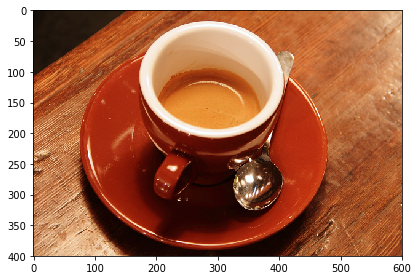

In [101]:
# Load an image from disk
coffee = io.imread(os.path.join(skimage.data_dir, 'coffee.png'))
#coffee = io.imread(os.path.join(skimage.data_dir, 'astronaut.png'))

# Display the image
io.imshow(coffee)

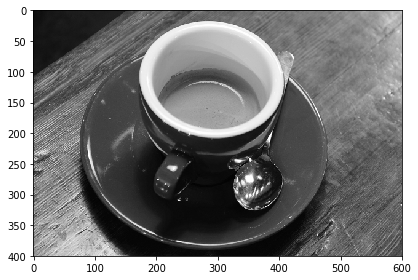

In [102]:
# Convert image to grayscale
groffee = skimage.color.rgb2gray(coffee)

io.imshow(groffee)

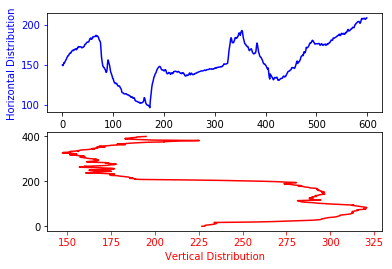

In [103]:
# Calculate the color distribution horizontaly and verticaly
hor_dist = groffee.sum(axis=0) # 600
ver_dist = groffee.sum(axis=1) # 400

# Both distributions have different x and y values, plot them as two seperate axes
f, [ax1, ax2] = plt.subplots(2, 1)

ax1.plot(np.arange(len(hor_dist)), hor_dist, color='b')
ax1.set_ylabel('Horizontal Distribution', color='b')
ax1.tick_params('y', colors='b')

ax2.plot(ver_dist, np.arange(len(ver_dist)), 'r')
ax2.set_xlabel('Vertical Distribution', color='r')
ax2.tick_params('x', colors='r')

# Note: black == 0.0, white == 1.0

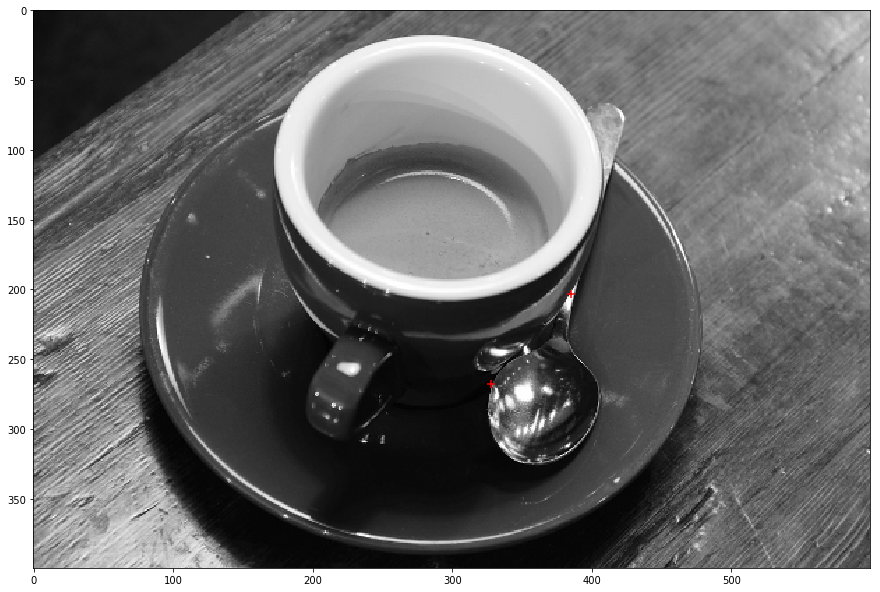

In [106]:
# Get pixel positions of min and max values
xmax, ymax = np.unravel_index(np.argmax(groffee), groffee.shape)
xmin, ymin = np.unravel_index(np.argmin(groffee), groffee.shape)

# Indicate the pixels with highest and lowest brigthness
f, ax = plt.subplots(figsize=(15, 15))
ax.imshow(groffee, cmap='gray')
ax.axes.scatter([ymax, ymin], [xmax, xmin], marker='+', color='red', s=50)

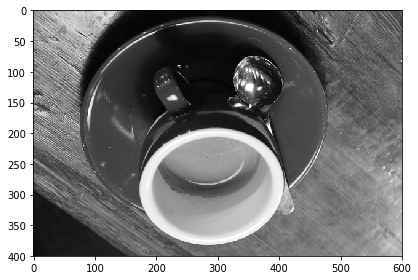

In [113]:
# Rotate the image by 180 degrees
io.imshow(np.flip(groffee, 0))
#io.imshow(groffee[::-1, :])